# **Intro to Neural Networks: Face Classification Challenge**


#### **Thank you for choosing to do this challenge! This task will help you take your deep learning knowledge and skills to the next level.**
 

1. In this challenge you will train an advanced CNN architecture of your choice and compete against your colleagues on Kaggle. Here's the link to the competition: https://www.kaggle.com/competitions/face-classification-challenge-public/
2. You're given a dataset with face images for 1000 different persons. Your aim is to train a model that takes an image of someone's face and returns the identity (name/label) of the person. You'll use the data in the "Train" folder for training the model, and the data in the "Valid" folder to validate it after every epoch. 
3. After you finish training, go to the folder "Test" and get the results of the 5000 images in it, put them in a csv file, and upload them to kaggle. 
4. You **MUST** use weights and biases while training your model, most importantly the "wandb.watch(model)" method and also record the training loss and accuracy. Not using wandb to record your model during training will result is disqualification from the challenge. 
5. You will need to use GPU resources to finish this challenge, you can get it for free on Google Colab or Kaggle itself.
6. Start the challenge by first training a simple (~5 Million parameters) CNN for only 10 epochs, which will give you a poor accuracy, then submit the results to Kaggle (submit on Midnight Sunday March 10th). This submission is to make sure your data loader and network are working properly.  
7. If you wish to solve this challenge you should implement more advanced CNN models, you need your models to be at most 30 Million parameters large so you can train them on Colab for free. Some of the advanced models you could try to implement are ResNet, Convnext, or Inception (Tutorials are availabe online to help you implement all of these), you can also do your own literature review. 
8. After implementing your advanced network, train it for 10 epochs and submit the results to Kaggle. You should get an accuracy greater than 10%. After that train your network for 80-100 (or even more) epochs, if it's a good network you will see an accuracy greater than 70%. 
9. This starter notebook uses pytorch, you're free to use tensorflow as you can easily adapt it. Tensorflow also has a powerful dataloading module. 






#### **General Information**
1. This competition is not mandatory, it grants bonus points and awards for the top positions (depending on the leaderboard). 
2. You can either work alone or form a team of up to three students. 
3. You're not allowed to ask for help from ANYONE outside your team (remember, this is a COMPETITION), if you need anything reach out to "Muhammad" at any time of the day via Email, Whatsapp, Zoom call or else. He'll be availabe to help you with this challenge in full capacity. 
4. You're not allowed to use pretrained models!
5. After the competition deadline, you'll have to share your colab notebook as well as your weights and biases runs to verify your work. 


# Preliminaries

Common errors which you may face in this homeworks (because of the size of the model)


*   CUDA Out of Memory (OOM): You can tackle this problem by (1) Reducing the batch size (2) Calling `torch.cuda.empty_cache()` and `gc.collect()` (3) Finally restarting the runtime



In [ ]:
!nvidia-smi # to see what GPU you have

Tue Mar 21 03:44:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   78C    P0    42W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install wandb --quiet

In [2]:
import torch
from torchsummary import summary
import torchvision #This library is used for image-based operations (Augmentations)
import os
import gc
from tqdm import tqdm
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import glob
import wandb
import matplotlib.pyplot as plt
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Device: ", DEVICE)

Device:  cuda


# TODOs
As you go, please read the code and keep an eye out for TODOs!

# Download Data from Kaggle

In [3]:
# TODO: Use the same Kaggle code from HW1P2
!pip install --upgrade --force-reinstall --no-deps kaggle==1.5.8
!mkdir /root/.kaggle

with open("/root/.kaggle/kaggle.json", "w+") as f:
  f.write('{"username":"armeline_dembo","key":"00000000000000000000000000"}')  #  Put your kaggle username & key here
    

!chmod 600 /root/.kaggle/kaggle.json

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 829.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.8-py3-none-any.whl size=73248 sha256=d35970067bfc8d81fdddead69c9a818b6d2e58d851ce2bcbad95589f2cb38cf2
  Stored in directory: /root/.cache/pip/wheels/0b/76/ca/e58f8afa83166a0e68f0d5cd2e7f99d260bdc40e35da080eee
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16


In [4]:
!mkdir '/content/data'

!kaggle competitions download -c face-classification-challenge-public
!unzip -qo 'face-classification-challenge-public.zip' -d '/content/data'


 96% 200M/207M [00:01<00:00, 203MB/s]
100% 207M/207M [00:01<00:00, 167MB/s]


# Configs

In [5]:
config = {
    'batch_size': 128, # Increase this if your GPU can handle it
    'lr': 0.1,
    'epochs': 10, # 10 epochs is recommended ONLY for the early submission - you will have to train for much longer typically.
    # Include other parameters as needed.
}

# Classification Dataset

In [6]:
DATA_DIR    = '/content/data/face_class/'# TODO: Path where you have downloaded the data
TRAIN_DIR   = os.path.join(DATA_DIR, "Train")
VAL_DIR     = os.path.join(DATA_DIR, "Valid")
TEST_DIR    = os.path.join(DATA_DIR, "Test")

# Transforms using torchvision - Refer https://pytorch.org/vision/stable/transforms.html


# Implementing the right train transforms/augmentation methods is key to improving performance.

train_transforms = torchvision.transforms.Compose([
    # Training augmentations
])

valid_transforms = torchvision.transforms.Compose([
    # Validation and testing augmentations 
])



# Load the traing and validation data here Hint: see how torchvision ImageFolder has to offer 
train_dataset   = 
valid_dataset   = 
test_dataset   = 
# Alternatively you can write your own DataSet class as we did in the tutorial


# Create data loaders
train_loader = torch.utils.data.DataLoader(
    # Create the training data loader 
)

valid_loader = torch.utils.data.DataLoader(
    # Create the validation data loader 
)

test_loader = torch.utils.data.DataLoader(
    # Create the test data loader 
)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [52]:
print("Number of classes    : ", len(train_dataset.classes))
print("No. of train images  : ", train_dataset.__len__())
print("Shape of image       : ", train_dataset[0][0].shape)
print("Batch size           : ", config['batch_size'])
print("Train batches        : ", train_loader.__len__())
print("Val batches          : ", valid_loader.__len__())

Number of classes    :  1000
No. of train images  :  15000
Shape of image       :  torch.Size([3, 224, 224])
Batch size           :  128
Train batches        :  118
Val batches          :  40


## Data visualization

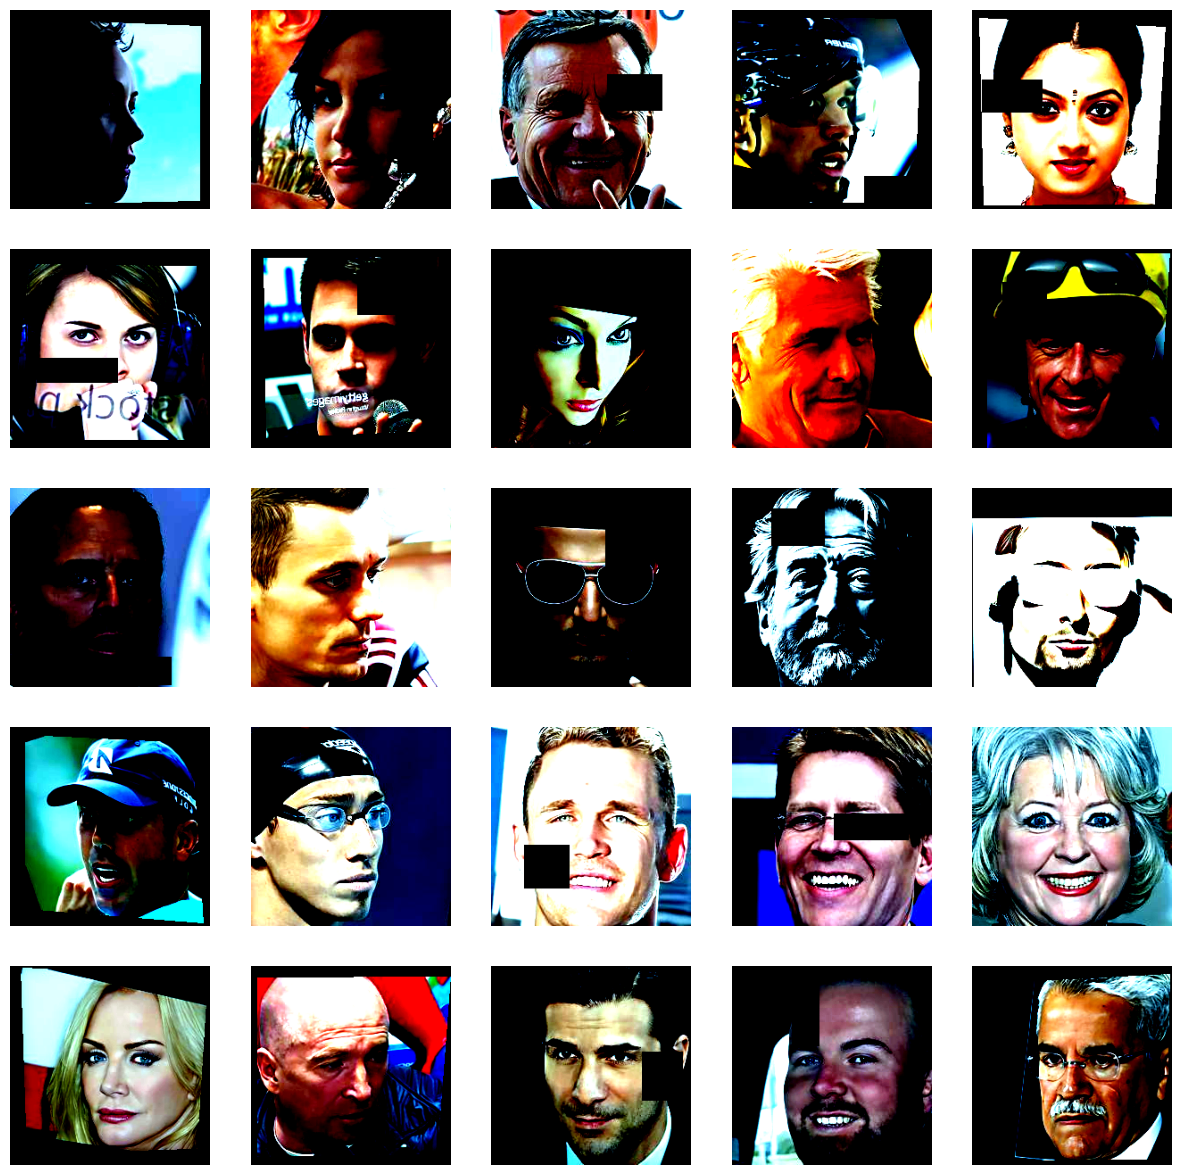

In [10]:
# Visualize a few images in the dataset
# You can write your own code, and you don't need to understand the code
# It is highly recommended that you visualize your data augmentation as sanity check

r, c    = [5, 5]
fig, ax = plt.subplots(r, c, figsize= (15, 15))

k       = 0
dtl     = torch.utils.data.DataLoader(
    dataset     = torchvision.datasets.ImageFolder(TRAIN_DIR, transform= train_transforms), # dont wanna see the images with transforms
    batch_size  = config['batch_size'],
    shuffle     = True,
)

for data in dtl:
    x, y = data

    for i in range(r):
        for j in range(c):
            img = x[k].numpy().transpose(1, 2, 0)
            ax[i, j].imshow(img)
            ax[i, j].axis('off')
            k+=1
    break

del dtl

# Very Simple Network (for Mandatory Early Submission)

In [ ]:
from torch.nn.modules.activation import ReLU
class Network(torch.nn.Module):
    """
    The Very Low early deadline architecture is a 4-layer CNN.

    The first Conv layer has 64 channels, kernel size 7, and stride 4.
    The next three have 128, 256, and 512 channels. Each have kernel size 3 and stride 2.

    Think about strided convolutions from the lecture, as convolutioin with stride= 1 and downsampling.
    For stride 1 convolution, what padding do you need for preserving the spatial resolution?
    (Hint => padding = kernel_size // 2) - Why?)

    Each Conv layer is accompanied by a Batchnorm and ReLU layer.
    Finally, you want to average pool over the spatial dimensions to reduce them to 1 x 1. Use AdaptiveAvgPool2d.
    Then, remove (Flatten?) these trivial 1x1 dimensions away.
    Look through https://pytorch.org/docs/stable/nn.html

    TODO: Fill out the model definition below!

    Why does a very simple network have 4 convolutions?
    Input images are 224x224. Note that each of these convolutions downsample.
    Downsampling 2x effectively doubles the receptive field, increasing the spatial
    region each pixel extracts features from. Downsampling 32x is standard
    for most image models.

    Why does a very simple network have high channel sizes?
    Every time you downsample 2x, you do 4x less computation (at same channel size).
    To maintain the same level of computation, you 2x increase # of channels, which
    increases computation by 4x. So, balances out to same computation.
    Another intuition is - as you downsample, you lose spatial information. We want
    to preserve some of it in the channel dimension.
    """

    def __init__(self, num_classes=1000):
        super().__init__()

        self.backbone = torch.nn.Sequential(
            # TODO
            
            )

        self.cls_layer = torch.nn.Linear(512, num_classes)

    def forward(self, x):
        
        
        feats = self.backbone(x)
        out = self.cls_layer(feats)


        return out



# Setup everything for training

# Let's train!

In [63]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [21]:
model = Network().to(device)

In [65]:
from torchsummary import summary

In [ ]:
# This command allows you to see how many parameters your network has.
summary(model, (3, 224, 224))

In [67]:
def train(model, dataloader, optimizer, criterion):

    model.train()

    # Progress Bar
    batch_bar   = tqdm(total=len(dataloader), dynamic_ncols=True, leave=False, position=0, desc='Train', ncols=5)

    num_correct = 0
    total_loss  = 0

    for i, (images, labels) in enumerate(dataloader):

        optimizer.zero_grad() # Zero gradients

        images, labels = images.to(DEVICE), labels.to(DEVICE)

        with torch.cuda.amp.autocast(): # This implements mixed precision. Thats it!
            outputs =   # Do forward pass
            loss    =   # Get loss


        # Update no. of correct predictions & loss as we iterate
        num_correct     +=      
        total_loss      += 

        # tqdm lets you add some details so you can monitor training as you train.
        batch_bar.set_postfix(
            acc         = "{:.04f}%".format(100 * num_correct / (config['batch_size']*(i + 1))),
            loss        = "{:.04f}".format(float(total_loss / (i + 1))),
            num_correct = num_correct,
            lr          = "{:.04f}".format(float(optimizer.param_groups[0]['lr']))
        )

        torch.nan_to_num(loss)
        scaler.scale(loss).backward() # This is a replacement for loss.backward()

        scaler.step(optimizer) # This is a replacement for optimizer.step()
        scaler.update()

        

        batch_bar.update() # Update tqdm bar

    batch_bar.close() # You need this to close the tqdm bar

    acc         =       # Calculate accuracy for the epoch
    total_loss  =       # Calculate loss for the epoch


    return acc, total_loss

In [68]:
def validate(model, dataloader, criterion):

    # TODO: Implement the function for validating the model.

In [69]:
CUDA_LAUNCH_BLOCKING=1

In [42]:
gc.collect() # These commands help you when you face CUDA OOM error
torch.cuda.empty_cache()

# Wandb

In [28]:
wandb.login(key="put your api key here!") #API Key is in your wandb account, under settings (wandb.ai/settings)

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [70]:
# Create your wandb run
run = wandb.init(
    name = "run number one", ## Wandb creates random run names if you skip this field
    reinit = True, ### Allows reinitalizing runs when you re-run this cell
    project = "face-class", ### Project should be created in your wandb account
    config = config ### Wandb Config for your run
)

# Experiments

In [71]:
criterion =              # TODO: What loss do you need for a multi class classification problem?
optimizer =              # Choose your fav optimizer
# TODO: Implement a scheduler (Optional but Highly Recommended)
# You can try ReduceLRonPlateau, StepLR, MultistepLR, CosineAnnealing, etc.

scaler = torch.cuda.amp.GradScaler() # Good news. We have FP16 (Mixed precision training) implemented for you
# It is useful only in the case of compatible GPUs such as T4/V100

In [ ]:
# Here's the training loop fully impelemented for you!

best_valacc = 0.0

for epoch in range(config['epochs']):

    curr_lr = float(optimizer.param_groups[0]['lr'])

    train_acc, train_loss = train(model, train_loader, optimizer, criterion)

    print("\nEpoch {}/{}: \nTrain Acc {:.04f}%\t Train Loss {:.04f}\t Learning Rate {:.04f}".format(
        epoch + 1,
        config['epochs'],
        train_acc,
        train_loss,
        curr_lr))

    val_acc, val_loss = validate(model, valid_loader, criterion)
    scheduler.step(val_acc)
    # scheduler.step()

    print("Val Acc {:.04f}%\t Val Loss {:.04f}".format(val_acc, val_loss))

    wandb.log({"train_loss":train_loss, 'train_Acc': train_acc, 'validation_Acc':val_acc,
               'validation_loss': val_loss, "learning_Rate": curr_lr})

    # If you are using a scheduler in your train function within your iteration loop, you may want to log
    # your learning rate differently

    # #Save model in drive location if val_acc is better than best recorded val_acc
    if val_acc >= best_valacc:
      #path = os.path.join(root, model_directory, 'checkpoint' + '.pth')
      print("Saving model")
      torch.save({'model_state_dict':model.state_dict(),
                  'optimizer_state_dict':optimizer.state_dict(),
                  #'scheduler_state_dict':scheduler.state_dict(),
                  'val_acc': val_acc,
                  'epoch': epoch}, './checkpoint-convnext-batchnorm.pth')
      best_valacc = val_acc
      wandb.save('checkpoint-convnext-batchnorm.pth')
      # You may find it interesting to exlplore Wandb Artifcats to version your models
run.finish()

Train:   0%|          | 0/118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



Epoch 1/10: 
Train Acc 0.3575%	 Train Loss 6.9265	 Learning Rate 0.0010


Val Acc 1.0156%	 Val Loss 6.6406
Saving model



Epoch 2/10: 
Train Acc 1.2447%	 Train Loss 6.6127	 Learning Rate 0.0010


Val Acc 3.3398%	 Val Loss 6.2348
Saving model



Epoch 3/10: 
Train Acc 3.0985%	 Train Loss 6.2829	 Learning Rate 0.0010


Val Acc 6.8359%	 Val Loss 5.8136
Saving model



Epoch 4/10: 
Train Acc 5.9388%	 Train Loss 6.0025	 Learning Rate 0.0010


Val Acc 12.0117%	 Val Loss 5.5461
Saving model


Train:  25%|██▍       | 29/118 [00:34<01:45,  1.18s/it, acc=10.5990%, loss=5.6868, lr=0.0010, num_correct=407]

# Classification Task: Testing

In [53]:
def test(model,dataloader):

  # TODO: Impelement this function which will return the model classification results on the test data

In [57]:
test_results = test(model, test_loader)

## Generate csv to submit to Kaggle

In [58]:
with open("basic.csv", "w+") as f:
    f.write("ID,label\n")
    for i, img in enumerate(os.listdir('/content/data/face_class/Test')):
        f.write("{},{}\n".format(str(img), test_results[i]))

In [59]:
!kaggle competitions submit -c face-classification-challenge-public -f basic.csv -m "basic submission"

100% 63.0k/63.0k [00:00<00:00, 71.4kB/s]
Successfully submitted to Face Classification Challenge - Public